In [1]:
import pandas as pd
import collections
import operator
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


In [2]:
columns=['StartTime','Duration', 'Protocol', 'Source','Direction','Dest', 'Flags','Tos','Packet',' Bytes','Flows','Label']
lst=[]
with open('capture20110818.pcap.netflow.labeled') as fp:  
    for cnt, line in enumerate(fp):
        k=[]
        if cnt!=0:
            dat=line.split("\t")
            if len(dat)>=13:
                for d in dat:
                    d.strip()
                    if len(d)==0:
                        k = dat.remove(d)
            if k:
                lst.append(k)
            else: lst.append(dat)
dataset=pd.DataFrame(lst, columns=columns)

dataset['SourceIP'] = dataset.Source.str.split(':').str.get(0)
dataset['PORTSOURCE'] = dataset.Source.str.split(':').str.get(1)
dataset['DestinationIP'] = dataset.Dest.str.split(':').str.get(0)
dataset['PORTDESTINATION'] = dataset.Dest.str.split(':').str.get(1)
dataset

,StartTime,Duration,Protocol,Source,Direction,Dest,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
0,2011-08-18 10:19:13.328,0.002,TCP,147.32.86.166:33426,->,212.24.150.110:25443,FRPA_,0,4,321,1,Background\n,147.32.86.166,33426,212.24.150.110,25443
1,2011-08-18 10:19:13.328,4.995,UDP,82.39.2.249:41915,->,147.32.84.59:43087,INT,0,617,40095,1,Background\n,82.39.2.249,41915,147.32.84.59,43087
2,2011-08-18 10:19:13.329,4.996,UDP,147.32.84.59:43087,->,82.39.2.249:41915,INT,0,1290,1909200,1,Background\n,147.32.84.59,43087,82.39.2.249,41915
3,2011-08-18 10:19:13.330,0.000,TCP,147.32.86.166:42020,->,147.32.192.34:993,A_,0,1,66,1,Background\n,147.32.86.166,42020,147.32.192.34,993
4,2011-08-18 10:19:13.330,0.000,TCP,212.24.150.110:25443,->,147.32.86.166:33426,FPA_,0,2,169,1,Background\n,212.24.150.110,25443,147.32.86.166,33426
5,2011-08-18 10:19:13.333,4.185,TCP,115.184.37.24:49190,->,147.32.84.2:80,A_,0,25,1658,1,Background\n,115.184.37.24,49190,147.32.84.2,80
6,2011-08-18 10:19:13.335,4.978,TCP,80.78.79.156:51287,->,147.32.86.24:31002,PA_,0,311,70580,1,Background\n,80.78.79.156,51287,147.32.86.24,31002
7,2011-08-18 10:19:13.335,4.978,UDP,147.32.86.24:31002,->,151.41.188.39:49621,INT,0,292,64319,1,Background\n,147.32.86.24,31002,151.41.188.39,49621
8,2011-08-18 10:19:13.336,0.000,UDP,82.73.244.56:39051,->,147.32.84.118:1153,INT,0,1,145,1,Background\n,82.73.244.56,39051,147.32.84.118,1153
9,2011-08-18 10:19:13.336,0.000,ICMP,147.32.84.118,->,82.73.244.56,URP,0,1,173,1,Background\n,147.32.84.118,NaN,82.73.244.56,NaN


In [3]:
dataset=dataset.drop("Direction",1)
dataset=dataset.drop("Source",1)
dataset=dataset.drop("Dest",1)
dataset

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
0,2011-08-18 10:19:13.328,0.002,TCP,FRPA_,0,4,321,1,Background\n,147.32.86.166,33426,212.24.150.110,25443
1,2011-08-18 10:19:13.328,4.995,UDP,INT,0,617,40095,1,Background\n,82.39.2.249,41915,147.32.84.59,43087
2,2011-08-18 10:19:13.329,4.996,UDP,INT,0,1290,1909200,1,Background\n,147.32.84.59,43087,82.39.2.249,41915
3,2011-08-18 10:19:13.330,0.000,TCP,A_,0,1,66,1,Background\n,147.32.86.166,42020,147.32.192.34,993
4,2011-08-18 10:19:13.330,0.000,TCP,FPA_,0,2,169,1,Background\n,212.24.150.110,25443,147.32.86.166,33426
5,2011-08-18 10:19:13.333,4.185,TCP,A_,0,25,1658,1,Background\n,115.184.37.24,49190,147.32.84.2,80
6,2011-08-18 10:19:13.335,4.978,TCP,PA_,0,311,70580,1,Background\n,80.78.79.156,51287,147.32.86.24,31002
7,2011-08-18 10:19:13.335,4.978,UDP,INT,0,292,64319,1,Background\n,147.32.86.24,31002,151.41.188.39,49621
8,2011-08-18 10:19:13.336,0.000,UDP,INT,0,1,145,1,Background\n,82.73.244.56,39051,147.32.84.118,1153
9,2011-08-18 10:19:13.336,0.000,ICMP,URP,0,1,173,1,Background\n,147.32.84.118,NaN,82.73.244.56,NaN


In [4]:
#Drop background rows
datasetWithNoBackground=dataset[dataset.Label!="Background\n"]
datasetWithNoBackground

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
20,2011-08-18 10:19:13.347,4.985,TCP,PA_,0,91,86277,1,LEGITIMATE\n,147.32.80.13,80,147.32.85.88,56949
51,2011-08-18 10:19:13.392,0.000,TCP,A_,0,1,66,1,LEGITIMATE\n,147.32.86.110,48102,74.125.232.214,443
57,2011-08-18 10:19:13.411,4.921,TCP,A_,0,49,3234,1,LEGITIMATE\n,147.32.85.88,56949,147.32.80.13,80
73,2011-08-18 10:19:13.460,4.742,TCP,A_,0,118,7080,1,LEGITIMATE\n,147.32.84.59,2768,74.125.108.208,80
75,2011-08-18 10:19:13.486,0.000,TCP,A_,0,1,60,1,LEGITIMATE\n,147.32.84.59,56058,74.125.232.215,443
127,2011-08-18 10:19:13.689,4.434,TCP,A_,0,30,1980,1,LEGITIMATE\n,147.32.84.164,34588,195.24.232.164,80
193,2011-08-18 10:19:13.848,0.000,TCP,A_,0,1,66,1,LEGITIMATE\n,147.32.86.110,53538,74.125.232.215,443
196,2011-08-18 10:19:13.858,0.174,TCP,PA_,0,5,559,1,LEGITIMATE\n,147.32.84.59,37578,74.125.232.215,443
257,2011-08-18 10:19:14.067,0.009,TCP,FA_,0,2,120,1,LEGITIMATE\n,147.32.85.26,58763,209.85.148.147,80
268,2011-08-18 10:19:14.134,0.000,TCP,A_,0,1,66,1,LEGITIMATE\n,147.32.84.21,44146,74.125.232.216,443


In [5]:
Infectedhost1=datasetWithNoBackground[(datasetWithNoBackground.SourceIP=="147.32.84.191") | (datasetWithNoBackground.DestinationIP=="147.32.84.191")]
Infectedhost1

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
384290,2011-08-18 10:43:13.001,0.000,UDP,INT,0,1,64,1,Botnet\n,147.32.84.191,1025,147.32.80.9,53
384291,2011-08-18 10:43:13.002,0.000,UDP,INT,0,1,139,1,Botnet\n,147.32.80.9,53,147.32.84.191,1025
384884,2011-08-18 10:43:15.259,0.000,UDP,INT,0,1,87,1,Botnet\n,147.32.84.191,1025,147.32.80.9,53
384887,2011-08-18 10:43:15.269,0.000,UDP,INT,0,1,503,1,Botnet\n,147.32.80.9,53,147.32.84.191,1025
384890,2011-08-18 10:43:15.270,0.038,TCP,SRPA_,0,4,629,1,Botnet \n,147.32.84.191,1027,74.125.232.201,80
384894,2011-08-18 10:43:15.278,0.027,TCP,SPA_,0,3,253,1,Botnet\n,74.125.232.201,80,147.32.84.191,1027
385572,2011-08-18 10:43:18.170,0.000,UDP,INT,0,1,76,1,Botnet\n,147.32.84.191,1025,147.32.80.9,53
385575,2011-08-18 10:43:18.180,0.000,UDP,INT,0,1,403,1,Botnet\n,147.32.80.9,53,147.32.84.191,1025
385576,2011-08-18 10:43:18.182,2.984,UDP,INT,0,2,180,1,Botnet\n,147.32.84.191,123,65.55.56.40,123
469065,2011-08-18 10:48:31.962,0.000,UDP,INT,0,1,64,1,Botnet\n,147.32.84.191,1025,147.32.80.9,53


<Container object of 3 artists>

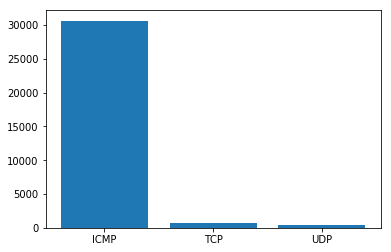

In [6]:
#visualize infected host protocols used
x=Infectedhost1['Protocol'].value_counts()
plt.bar(x.index,x)

<Container object of 3 artists>

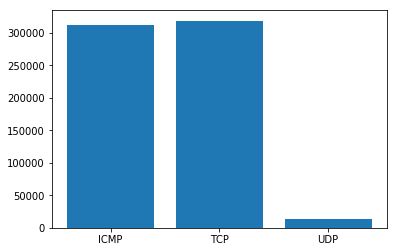

In [7]:
x=datasetWithNoBackground['Protocol'].value_counts()
plt.bar(x.index,x)

<Container object of 3 artists>

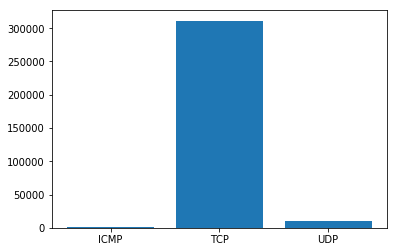

In [8]:
#visualize normal hostprotocols
Normal = datasetWithNoBackground.loc[(datasetWithNoBackground['Label']!='Botnet\n') & (datasetWithNoBackground['Label']!=' Botnet\n')]
x=Normal['Protocol'].value_counts()
plt.bar(x.index,x)

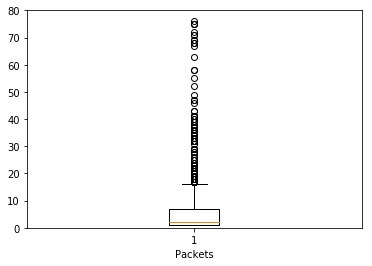

In [9]:
#boxplot of the normal host packet values
import matplotlib.pyplot as plt
plt.boxplot(Normal['Packet'].value_counts())
plt.xlabel("Packets")
plt.ylim(0, 80 )
plt.show()

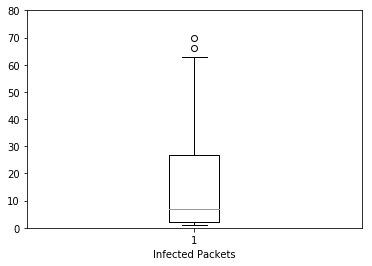

In [10]:
#boxplot of the infected host packet values
import matplotlib.pyplot as plt
plt.boxplot(Infectedhost1['Packet'].value_counts())
plt.xlabel("Infected Packets")
plt.ylim(0, 80 )
plt.show()

In [11]:
#Elbow function for determining number of clusters
def CreateElbow(X):

    X=X.reshape(-1,1)
    distorsions = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(7, 5))
    plt.plot(range(2, 10), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')

C:\Users\pc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


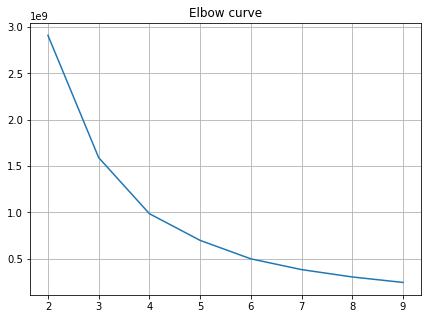

In [49]:
datasetWithNoBackground["Packet"]=pd.to_numeric(datasetWithNoBackground["Packet"],errors="ignore")
a=datasetWithNoBackground.dropna(subset=['Packet'])
CreateElbow(a['Packet'])

In [12]:
clusterData=datasetWithNoBackground.sort_values(by='Packet').dropna(subset=['Packet'])

In [13]:
clusterData

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
2213241,2011-08-18 12:33:10.235,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.205,NaN
2236611,2011-08-18 12:33:53.337,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.165,NaN
2236608,2011-08-18 12:33:53.334,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.208,NaN,147.32.96.69,NaN
2236603,2011-08-18 12:33:53.332,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN
2236599,2011-08-18 12:33:53.331,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN
2236597,2011-08-18 12:33:55.564,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.207,NaN,147.32.96.69,NaN
2236596,2011-08-18 12:33:53.327,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.192,NaN,147.32.96.69,NaN
2236594,2011-08-18 12:33:53.323,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN
2236593,2011-08-18 12:33:53.317,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.205,NaN,147.32.96.69,NaN
2236590,2011-08-18 12:33:53.310,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.208,NaN


In [15]:
#create percentiles
clusterData=datasetWithNoBackground.sort_values(by='Packet').dropna(subset=['Packet'])
clNr=5
percentilles =int( 100/clNr)
N = len(clusterData['Packet'])
r = {} # collection values
limits=[]
i=0    
for p in range(percentilles, 100, percentilles):
    r[p] = int((p/100.0) * N)
    limits.append(clusterData['Packet'].iloc[r[p]])
    i+=1
#limits

In [16]:
#maps each row to a cluster based on its packet value
def mapping_function(limits,bytes):
    for i in range(len(limits)):
        if(bytes<=limits[i]):
            return i
    return len(limits)
    
    

In [17]:
####
clusterData['cluster']=clusterData.apply(lambda row: mapping_function(limits,row['Packet']),axis=1)


In [18]:
clusterData

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION,cluster
2213241,2011-08-18 12:33:10.235,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.205,NaN,0
2236611,2011-08-18 12:33:53.337,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.165,NaN,0
2236608,2011-08-18 12:33:53.334,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.208,NaN,147.32.96.69,NaN,0
2236603,2011-08-18 12:33:53.332,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0
2236599,2011-08-18 12:33:53.331,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0
2236597,2011-08-18 12:33:55.564,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.207,NaN,147.32.96.69,NaN,0
2236596,2011-08-18 12:33:53.327,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.192,NaN,147.32.96.69,NaN,0
2236594,2011-08-18 12:33:53.323,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0
2236593,2011-08-18 12:33:53.317,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.205,NaN,147.32.96.69,NaN,0
2236590,2011-08-18 12:33:53.310,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.208,NaN,0


In [19]:
#creates clusters for protocol values
def ProtocolCluster(protocol):
    if protocol=='ICMP':
        return 0
    elif protocol=='TCP':
        return 1
    else:
        return 2

In [20]:
clusterData["ProtocolCluster"]=clusterData.apply(lambda row: ProtocolCluster(row['Protocol']),axis=1)

In [21]:
clusterData

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION,cluster,ProtocolCluster
2213241,2011-08-18 12:33:10.235,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.205,NaN,0,0
2236611,2011-08-18 12:33:53.337,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.165,NaN,0,0
2236608,2011-08-18 12:33:53.334,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.208,NaN,147.32.96.69,NaN,0,0
2236603,2011-08-18 12:33:53.332,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0,0
2236599,2011-08-18 12:33:53.331,0.000,ICMP,ECO,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0,0
2236597,2011-08-18 12:33:55.564,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.207,NaN,147.32.96.69,NaN,0,0
2236596,2011-08-18 12:33:53.327,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.192,NaN,147.32.96.69,NaN,0,0
2236594,2011-08-18 12:33:53.323,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.204,NaN,147.32.96.69,NaN,0,0
2236593,2011-08-18 12:33:53.317,0.000,ICMP,UNK,0,1,1066,1,Botnet\n,147.32.84.205,NaN,147.32.96.69,NaN,0,0
2236590,2011-08-18 12:33:53.310,0.000,ICMP,ECR,0,1,1066,1,Botnet\n,147.32.96.69,NaN,147.32.84.208,NaN,0,0


In [22]:
#mapping function that combines two descrete values created above into 1
def comfineDiscrete(protocolCluster,byteCluster):
    code=0
    spaceSize=15 #3X5
    return protocolCluster*(spaceSize/3)+byteCluster*(spaceSize/(3*5))

In [23]:
clusterData["FinalCode"]=clusterData.apply(lambda row: comfineDiscrete(row['ProtocolCluster'],row['cluster']),axis=1)

In [24]:
clusterData["FinalCode"].value_counts()

0.0     259331
5.0     105824
8.0     104796
9.0      97618
3.0      37116
4.0      15199
7.0      10591
10.0      9961
12.0      1602
14.0      1551
2.0        413
13.0        73
Name: FinalCode, dtype: int64

<Container object of 12 artists>

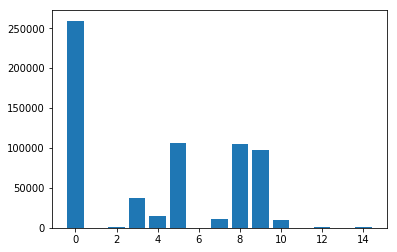

In [25]:
x=clusterData['FinalCode'].value_counts()
plt.bar(x.index,x)

<Container object of 12 artists>

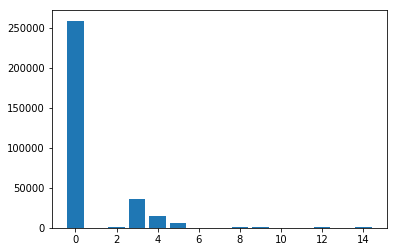

In [26]:
InfectedDataset = clusterData.loc[(clusterData['Label']=='Botnet\n') | (clusterData['Label']==' Botnet\n')]
x=InfectedDataset['FinalCode'].value_counts()
plt.bar(x.index,x)

<Container object of 10 artists>

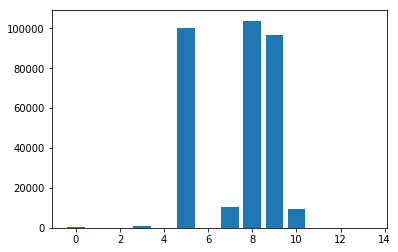

In [27]:
Normal = clusterData.loc[(clusterData['Label']!='Botnet\n') & (clusterData['Label']!=' Botnet\n')]
x=Normal['FinalCode'].value_counts()
plt.bar(x.index,x)

In [28]:
clusterData.to_pickle('clusteredDataFrame.pkl')